In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('감성분석포함한모델kpf_bert.csv')
df

,date,title,content,press,nouns,filtered_nouns,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,sentiment_score,date_format
0,2022-01-01 00:00:00,전셋값 치솟던 제주도도 안정세…올해 전세시장 전망은?,작년 전국에서 전셋값 가장 많이 오른 제주도지난해 말부터 안정세…서울도 4주 연속 ...,아시아경제,"['작년', '전국', '셋값', '가장', '오른', '제주도', '지난해', '...","['작년', '전국', '셋값', '오른', '제주도', '지난해', '안정', '...",0.121437,0.000000,0.000000,0.450331,0.000000,0.000000,0.067100,0.097021,0.051000,0.011059,0.191445,0.556848,YYYYMMDD
1,2022-01-01 00:00:00,집값 15% 올랐다… IMF 이후 가장 높은 상승률 [체크리포트],2021년 집값 상승률이 15%에 육박한 것으로 나타났다. 이는 국제통화기금(IMF...,이코노미스트,"['집값', '상', '승률', '육박', '것', '국제통화기금', '외환위기',...","['집값', '승률', '육박', '국제통화기금', '외환위기', '직후', '부동...",0.120449,0.000000,0.000000,0.868780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.574814,YYYYMMDD
2,2022-01-01 00:00:00,국내 부동산 투기꾼 1호…공주갑부 김갑순을 아시나요 [김준태 조선의 부자들⑬],선행 베풀다 인생 역전…충청도 일대 최고 땅부자로 우뚝‘유능한 화폐 제조기’이자 ‘...,이코노미스트,"['선행', '인생', '역전', '충청도', '일대', '최고', '땅', '부자...","['선행', '인생', '역전', '충청도', '일대', '최고', '부자', '우...",0.171688,0.135577,0.027560,0.000000,0.151685,0.140002,0.000000,0.127999,0.061289,0.000000,0.172259,0.597069,YYYYMMDD
3,2022-01-01 00:00:00,[맛있는 부동산] 산단 배후지역 아파트 매매·분양시장 '활기',김해 장유역 한라비발디 센트로 투시도 파이낸셜뉴스 산업단지나 국가시설을 품고 있는 ...,파이낸셜뉴스,"['김해', '장유역', '한라', '비발디', '센트', '투시도', '파이낸셜뉴...","['김해', '장유역', '한라', '비발디', '센트', '투시도', '파이낸셜뉴...",0.000000,0.609038,0.026804,0.141050,0.000000,0.000000,0.173669,0.047016,0.000000,0.000000,0.000000,0.582434,YYYYMMDD
4,2022-01-01 00:00:00,"[영상] 집값 주춤, '변곡점'일까 '반짝'일까....부동산 전문가가 바라본 올해 ...","집값, '잠깐 하락'···내년에도 상승세 계속될 것삼성역과 DMC역 주변, 집값 상...",서울경제,"['집값', '잠깐', '하락', '내년', '상승세', '계속', '것', '삼성...","['집값', '하락', '내년', '상승세', '계속', '삼성역', '주변', '...",0.562945,0.069340,0.000000,0.242908,0.000000,0.029903,0.036767,0.000000,0.051220,0.000000,0.000000,0.553816,YYYYMMDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128752,2023-03-31 00:00:00,집 짓기 꺼리는 건설사들… 3년 뒤 집값이 위험하다,올 들어 ‘주택 공급 3대 선행 지표’인 인허가·착공·분양 실적이 평년 대비 20%...,조선일보,"['주택', '공급', '선행', '지표', '인', '인', '허가', '착공',...","['주택', '공급', '선행', '지표', '허가', '착공', '분양', '실적...",0.075008,0.000000,0.000000,0.360560,0.080804,0.092965,0.176107,0.000000,0.035240,0.177849,0.000000,0.549970,YYYYMMDD
128753,2023-03-31 00:00:00,"[이미연의 발로 뛰는 부동산] ""아직 괜찮지만…"" 부산에 `미분양 경고등` 켜질까요",안녕하세요 금융부동산부 이미연입니다. 오늘은 함께 부산으로 가보실까요. 그런데 주제...,디지털타임스,"['금융', '부동산', '부', '이미연', '오늘', '부산', '요', '주제...","['금융', '부동산', '이미연', '오늘', '부산', '주제가', '미분', ...",0.058195,0.368419,0.000000,0.028224,0.032704,0.000000,0.389060,0.075932,0.000000,0.043139,0.000000,0.515943,YYYYMMDD
128754,2023-03-31 00:00:00,네옴시티 호재에도 해외건설 수주 주춤...중동서 늘은 물량 동남아서 빠졌다,"올들어 61억달러 수주, 작년 동기 대비 8% 감소국내 건설사의 한 해외건설 현장 ...",디지털타임스,"['수주', '작년', '동기', '대비', '감소', '국내', '건설', '사의...","['수주', '작년', '동기', '감소', '국내', '건설', '사의', '해외...",0.000000,0.000000,0.000000,0.121447,0.000000,0.868254,0.000000,0.000000,0.000000,0.000000,0.000000,-0.567532,YYYYMMDD
128755,2023-03-31 00:00:00,삼성전자가 300조 투자하는 용인…처인구 아파트값 보름새 1억 상승,‘반도체 특수’ 기대로 경기도 용인시 처인구 아파트값이 10개월 만에 반등했다. 서...,중앙일보,"['반도체', '특수', '기대', '경기도', '용인시', '처인구', '아파트'...","['반도체', '특수', '기대', '경기도', '용인시', '처인구', '아파트'...",0.018451,0.166964,0.000000,0.722744,0.000000,0.000000,0.013423,0.041024,0.016726,0.018050,0.000000,0.577977,YYYYMMDD


In [70]:
df.iloc[6775,:]

title                                        삼성물산 건설, 협력사 안전관리 지원 확대
content            주요 협력사와 '안전경영 실천 선포식' 개최안전 인센티브 확대 시행   삼성물산 건...
press                                                         이코노미스트
nouns              ['주요', '협력', '안전', '경영', '실천', '선포', '개최', '안전...
filtered_nouns     ['주요', '협력', '안전', '경영', '실천', '선포', '개최', '안전...
Topic 0                                                          0.0
Topic 1                                                          0.0
Topic 2                                                          0.0
Topic 3                                                          0.0
Topic 4                                                     0.463175
Topic 5                                                     0.500571
Topic 6                                                     0.019446
Topic 7                                                          0.0
Topic 8                                                          0.0
Topic 9                           

In [6]:
df['total0']=df['Topic 0']*df['sentiment_score']
df['total1']=df['Topic 1']*df['sentiment_score']
df['total2']=df['Topic 2']*df['sentiment_score']
df['total3']=df['Topic 3']*df['sentiment_score']
df['total4']=df['Topic 4']*df['sentiment_score']
df['total5']=df['Topic 5']*df['sentiment_score']
df['total6']=df['Topic 6']*df['sentiment_score']
df['total7']=df['Topic 7']*df['sentiment_score']
df['total8']=df['Topic 8']*df['sentiment_score']
df['total9']=df['Topic 9']*df['sentiment_score']
df['total10']=df['Topic 10']*df['sentiment_score']
df

,date,title,content,press,nouns,filtered_nouns,Topic 0,Topic 1,Topic 2,Topic 3,...,total1,total2,total3,total4,total5,total6,total7,total8,total9,total10
0,2022-01-01 00:00:00,전셋값 치솟던 제주도도 안정세…올해 전세시장 전망은?,작년 전국에서 전셋값 가장 많이 오른 제주도지난해 말부터 안정세…서울도 4주 연속 ...,아시아경제,"['작년', '전국', '셋값', '가장', '오른', '제주도', '지난해', '...","['작년', '전국', '셋값', '오른', '제주도', '지난해', '안정', '...",0.121437,0.000000,0.000000,0.450331,...,0.000000,0.000000,0.250766,0.000000,0.000000,0.037364,0.054026,0.028399,0.006158,0.106606
1,2022-01-01 00:00:00,집값 15% 올랐다… IMF 이후 가장 높은 상승률 [체크리포트],2021년 집값 상승률이 15%에 육박한 것으로 나타났다. 이는 국제통화기금(IMF...,이코노미스트,"['집값', '상', '승률', '육박', '것', '국제통화기금', '외환위기',...","['집값', '승률', '육박', '국제통화기금', '외환위기', '직후', '부동...",0.120449,0.000000,0.000000,0.868780,...,0.000000,0.000000,0.499387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022-01-01 00:00:00,국내 부동산 투기꾼 1호…공주갑부 김갑순을 아시나요 [김준태 조선의 부자들⑬],선행 베풀다 인생 역전…충청도 일대 최고 땅부자로 우뚝‘유능한 화폐 제조기’이자 ‘...,이코노미스트,"['선행', '인생', '역전', '충청도', '일대', '최고', '땅', '부자...","['선행', '인생', '역전', '충청도', '일대', '최고', '부자', '우...",0.171688,0.135577,0.027560,0.000000,...,0.080949,0.016455,0.000000,0.090566,0.083591,0.000000,0.076424,0.036594,0.000000,0.102850
3,2022-01-01 00:00:00,[맛있는 부동산] 산단 배후지역 아파트 매매·분양시장 '활기',김해 장유역 한라비발디 센트로 투시도 파이낸셜뉴스 산업단지나 국가시설을 품고 있는 ...,파이낸셜뉴스,"['김해', '장유역', '한라', '비발디', '센트', '투시도', '파이낸셜뉴...","['김해', '장유역', '한라', '비발디', '센트', '투시도', '파이낸셜뉴...",0.000000,0.609038,0.026804,0.141050,...,0.354725,0.015612,0.082152,0.000000,0.000000,0.101151,0.027384,0.000000,0.000000,0.000000
4,2022-01-01 00:00:00,"[영상] 집값 주춤, '변곡점'일까 '반짝'일까....부동산 전문가가 바라본 올해 ...","집값, '잠깐 하락'···내년에도 상승세 계속될 것삼성역과 DMC역 주변, 집값 상...",서울경제,"['집값', '잠깐', '하락', '내년', '상승세', '계속', '것', '삼성...","['집값', '하락', '내년', '상승세', '계속', '삼성역', '주변', '...",0.562945,0.069340,0.000000,0.242908,...,0.038402,0.000000,0.134526,0.000000,0.016561,0.020362,0.000000,0.028366,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128752,2023-03-31 00:00:00,집 짓기 꺼리는 건설사들… 3년 뒤 집값이 위험하다,올 들어 ‘주택 공급 3대 선행 지표’인 인허가·착공·분양 실적이 평년 대비 20%...,조선일보,"['주택', '공급', '선행', '지표', '인', '인', '허가', '착공',...","['주택', '공급', '선행', '지표', '허가', '착공', '분양', '실적...",0.075008,0.000000,0.000000,0.360560,...,0.000000,0.000000,0.198298,0.044440,0.051128,0.096854,0.000000,0.019381,0.097812,0.000000
128753,2023-03-31 00:00:00,"[이미연의 발로 뛰는 부동산] ""아직 괜찮지만…"" 부산에 `미분양 경고등` 켜질까요",안녕하세요 금융부동산부 이미연입니다. 오늘은 함께 부산으로 가보실까요. 그런데 주제...,디지털타임스,"['금융', '부동산', '부', '이미연', '오늘', '부산', '요', '주제...","['금융', '부동산', '이미연', '오늘', '부산', '주제가', '미분', ...",0.058195,0.368419,0.000000,0.028224,...,0.190083,0.000000,0.014562,0.016874,0.000000,0.200733,0.039176,0.000000,0.022257,0.000000
128754,2023-03-31 00:00:00,네옴시티 호재에도 해외건설 수주 주춤...중동서 늘은 물량 동남아서 빠졌다,"올들어 61억달러 수주, 작년 동기 대비 8% 감소국내 건설사의 한 해외건설 현장 ...",디지털타임스,"['수주', '작년', '동기', '대비', '감소', '국내', '건설', '사의...","['수주', '작년', '동기', '감소', '국내', '건설', '사의', '해외...",0.000000,0.000000,0.000000,0.121447,...,-0.000000,-0.000000,-0.068925,-0.000000,-0.492762,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
128755,2023-03-31 00:00:00,삼성전자가 300조 투자하는 용인…처인구 아파트값 보름새 1억 상승,‘반도체 특수’ 기대로 경기도 용인시 처인구 아파트값이 10개월 만에 반등했다. 서...,중앙일보,"['반도체', '특수', '기대', '경기도', '용인시', '처인구', '아파트'...","['반도체', '특수', '기대', '경기도', '용인시', '처인구', '아파트'...",0.018451,0.166964,0.000000,0.722744,...,0.096502,0.000000,0.417729,0.000000,0.000000,0.007758,0.023711,0.009667,0.010432,0.000000


In [8]:
# 날짜별로 그룹화하여 합계 계산
daily_sum = df.groupby('date')[['total0','total1','total2','total3','total4','total5','total6','total7','total8','total9','total10']].sum()
daily_sum = pd.DataFrame(daily_sum)

In [10]:
daily_sum

,total0,total1,total2,total3,total4,total5,total6,total7,total8,total9,total10
date,,,,,,,,,,,
2022-01-01 00:00:00,3.924724,4.660772,0.166522,3.254444,0.816995,0.536335,2.753405,0.620692,1.589821,0.990407,1.922718
2022-01-02 00:00:00,16.705105,6.989256,3.886773,24.334013,8.639523,10.270371,5.971225,1.484516,9.697094,8.528520,4.579101
2022-01-03 00:00:00,21.438099,20.710469,18.818878,25.545571,10.741860,48.064949,8.025646,6.650537,13.422774,6.390490,7.439451
2022-01-04 00:00:00,17.637131,32.693435,11.516575,36.982684,8.935103,24.827888,20.947106,10.527428,13.061170,9.308912,10.881491
2022-01-05 00:00:00,33.736347,27.213904,5.925228,32.068831,31.617951,11.281520,16.582658,14.941598,22.177709,6.552993,19.751247
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27 00:00:00,8.466213,6.737498,0.621352,15.352724,-0.803712,4.819888,8.260103,-1.349809,9.254323,5.189360,3.992671
2023-03-28 00:00:00,6.376023,9.141353,1.997706,18.768527,-6.346610,9.131547,9.703533,-0.496198,13.465333,14.493282,7.181278
2023-03-29 00:00:00,8.088154,15.772798,0.223913,15.959699,12.018784,22.059811,8.508030,-0.591200,11.834903,6.046582,14.965120


In [12]:
# 데이터프레임 인덱스를 DatetimeIndex로 설정
daily_sum.index = pd.to_datetime(daily_sum.index)

In [14]:
# 'date' 열을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'])

# 'date' 열을 데이터프레임의 인덱스로 설정
df.set_index('date', inplace=True)

In [16]:
# 주별로 데이터 재샘플링
weekly_sum = daily_sum.resample('W-MON').sum()
weekly_sum =pd.DataFrame(weekly_sum)
weekly_sum.reset_index(inplace=True)
weekly_sum

,date,total0,total1,total2,total3,total4,total5,total6,total7,total8,total9,total10
0,2022-01-03,42.067928,32.360496,22.872173,53.134028,20.198377,58.871654,16.750276,8.755745,24.709689,15.909418,13.941270
1,2022-01-10,98.271322,149.476674,79.469488,183.059450,84.049811,84.697347,112.774680,51.879674,88.253091,40.612381,60.048640
2,2022-01-17,67.594357,170.422917,64.453565,143.974520,299.330293,137.452494,110.204312,36.311010,107.053012,82.703720,41.374821
3,2022-01-24,86.609101,169.081576,68.950402,191.569157,178.111092,153.857568,77.551245,44.831870,96.582467,65.050835,48.089101
4,2022-01-31,70.815105,137.759602,72.715892,148.318635,86.101498,153.961665,68.578377,38.824807,100.226793,47.929955,36.605797
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2023-03-06,54.270474,56.217168,6.769294,118.000208,59.627168,32.125578,63.044303,-5.043165,21.853866,30.857801,35.222683
62,2023-03-13,46.800235,54.608896,-8.939876,95.191577,52.693473,36.166096,50.833778,-0.875028,51.429152,49.827391,59.345610
63,2023-03-20,51.551469,58.620659,11.856678,164.477507,32.554726,15.984937,49.698821,-0.627392,22.892973,57.607747,41.749815
64,2023-03-27,69.475167,65.443560,-9.466157,97.640420,32.148063,38.439792,51.279026,-3.015006,25.480416,38.298508,48.592875


In [18]:
# 주별 데이터 행의 수 계산
weekly_count = df.resample('W-MON').size()
weekly_count=pd.DataFrame(weekly_count,columns=['weekly_count'])
weekly_count.reset_index(inplace=True)
weekly_count

,date,weekly_count
0,2022-01-03,550
1,2022-01-10,1849
2,2022-01-17,2253
3,2022-01-24,2104
4,2022-01-31,1692
...,...,...
61,2023-03-06,1999
62,2023-03-13,2110
63,2023-03-20,2131
64,2023-03-27,2379


In [20]:
merged_df = pd.merge(weekly_sum, weekly_count, on='date', how='left')
merged_df

,date,total0,total1,total2,total3,total4,total5,total6,total7,total8,total9,total10,weekly_count
0,2022-01-03,42.067928,32.360496,22.872173,53.134028,20.198377,58.871654,16.750276,8.755745,24.709689,15.909418,13.941270,550
1,2022-01-10,98.271322,149.476674,79.469488,183.059450,84.049811,84.697347,112.774680,51.879674,88.253091,40.612381,60.048640,1849
2,2022-01-17,67.594357,170.422917,64.453565,143.974520,299.330293,137.452494,110.204312,36.311010,107.053012,82.703720,41.374821,2253
3,2022-01-24,86.609101,169.081576,68.950402,191.569157,178.111092,153.857568,77.551245,44.831870,96.582467,65.050835,48.089101,2104
4,2022-01-31,70.815105,137.759602,72.715892,148.318635,86.101498,153.961665,68.578377,38.824807,100.226793,47.929955,36.605797,1692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2023-03-06,54.270474,56.217168,6.769294,118.000208,59.627168,32.125578,63.044303,-5.043165,21.853866,30.857801,35.222683,1999
62,2023-03-13,46.800235,54.608896,-8.939876,95.191577,52.693473,36.166096,50.833778,-0.875028,51.429152,49.827391,59.345610,2110
63,2023-03-20,51.551469,58.620659,11.856678,164.477507,32.554726,15.984937,49.698821,-0.627392,22.892973,57.607747,41.749815,2131
64,2023-03-27,69.475167,65.443560,-9.466157,97.640420,32.148063,38.439792,51.279026,-3.015006,25.480416,38.298508,48.592875,2379


In [22]:
merged_df['average_total0'] = merged_df['total0'] / merged_df['weekly_count']
merged_df['average_total1'] = merged_df['total1'] / merged_df['weekly_count']
merged_df['average_total2'] = merged_df['total2'] / merged_df['weekly_count']
merged_df['average_total3'] = merged_df['total3'] / merged_df['weekly_count']
merged_df['average_total4'] = merged_df['total4'] / merged_df['weekly_count']
merged_df['average_total5'] = merged_df['total5'] / merged_df['weekly_count']
merged_df['average_total6'] = merged_df['total6'] / merged_df['weekly_count']
merged_df['average_total7'] = merged_df['total7'] / merged_df['weekly_count']
merged_df['average_total8'] = merged_df['total8'] / merged_df['weekly_count']
merged_df['average_total9'] = merged_df['total9'] / merged_df['weekly_count']
merged_df['average_total10'] = merged_df['total10'] / merged_df['weekly_count']

merged_df

,date,total0,total1,total2,total3,total4,total5,total6,total7,total8,...,average_total1,average_total2,average_total3,average_total4,average_total5,average_total6,average_total7,average_total8,average_total9,average_total10
0,2022-01-03,42.067928,32.360496,22.872173,53.134028,20.198377,58.871654,16.750276,8.755745,24.709689,...,0.058837,0.041586,0.096607,0.036724,0.107039,0.030455,0.015920,0.044927,0.028926,0.025348
1,2022-01-10,98.271322,149.476674,79.469488,183.059450,84.049811,84.697347,112.774680,51.879674,88.253091,...,0.080842,0.042980,0.099005,0.045457,0.045807,0.060992,0.028058,0.047730,0.021965,0.032476
2,2022-01-17,67.594357,170.422917,64.453565,143.974520,299.330293,137.452494,110.204312,36.311010,107.053012,...,0.075643,0.028608,0.063903,0.132859,0.061009,0.048914,0.016117,0.047516,0.036708,0.018364
3,2022-01-24,86.609101,169.081576,68.950402,191.569157,178.111092,153.857568,77.551245,44.831870,96.582467,...,0.080362,0.032771,0.091050,0.084654,0.073126,0.036859,0.021308,0.045904,0.030918,0.022856
4,2022-01-31,70.815105,137.759602,72.715892,148.318635,86.101498,153.961665,68.578377,38.824807,100.226793,...,0.081418,0.042976,0.087659,0.050887,0.090994,0.040531,0.022946,0.059236,0.028327,0.021635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2023-03-06,54.270474,56.217168,6.769294,118.000208,59.627168,32.125578,63.044303,-5.043165,21.853866,...,0.028123,0.003386,0.059030,0.029828,0.016071,0.031538,-0.002523,0.010932,0.015437,0.017620
62,2023-03-13,46.800235,54.608896,-8.939876,95.191577,52.693473,36.166096,50.833778,-0.875028,51.429152,...,0.025881,-0.004237,0.045114,0.024973,0.017140,0.024092,-0.000415,0.024374,0.023615,0.028126
63,2023-03-20,51.551469,58.620659,11.856678,164.477507,32.554726,15.984937,49.698821,-0.627392,22.892973,...,0.027509,0.005564,0.077183,0.015277,0.007501,0.023322,-0.000294,0.010743,0.027033,0.019592
64,2023-03-27,69.475167,65.443560,-9.466157,97.640420,32.148063,38.439792,51.279026,-3.015006,25.480416,...,0.027509,-0.003979,0.041043,0.013513,0.016158,0.021555,-0.001267,0.010711,0.016099,0.020426


In [30]:
merged_df1=merged_df.iloc[:,13:]
merged_df1

,average_total0,average_total1,average_total2,average_total3,average_total4,average_total5,average_total6,average_total7,average_total8,average_total9,average_total10
0,0.076487,0.058837,0.041586,0.096607,0.036724,0.107039,0.030455,0.015920,0.044927,0.028926,0.025348
1,0.053148,0.080842,0.042980,0.099005,0.045457,0.045807,0.060992,0.028058,0.047730,0.021965,0.032476
2,0.030002,0.075643,0.028608,0.063903,0.132859,0.061009,0.048914,0.016117,0.047516,0.036708,0.018364
3,0.041164,0.080362,0.032771,0.091050,0.084654,0.073126,0.036859,0.021308,0.045904,0.030918,0.022856
4,0.041853,0.081418,0.042976,0.087659,0.050887,0.090994,0.040531,0.022946,0.059236,0.028327,0.021635
...,...,...,...,...,...,...,...,...,...,...,...
61,0.027149,0.028123,0.003386,0.059030,0.029828,0.016071,0.031538,-0.002523,0.010932,0.015437,0.017620
62,0.022180,0.025881,-0.004237,0.045114,0.024973,0.017140,0.024092,-0.000415,0.024374,0.023615,0.028126
63,0.024191,0.027509,0.005564,0.077183,0.015277,0.007501,0.023322,-0.000294,0.010743,0.027033,0.019592
64,0.029204,0.027509,-0.003979,0.041043,0.013513,0.016158,0.021555,-0.001267,0.010711,0.016099,0.020426


In [32]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# MinMaxScaler 초기화
scaler = MinMaxScaler()

# 데이터프레임의 수치형 데이터에 대해 스케일링 적용
scaled_data = scaler.fit_transform(merged_df1)

# 스케일된 데이터를 다시 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=merged_df1.columns)

# 결과 출력
print(scaled_df.head())


   average_total0  average_total1  average_total2  average_total3  \
0        0.862277        0.764372        0.874905        0.921916   
1        0.719157        0.883131        0.887314        0.933832   
2        0.577218        0.855071        0.759374        0.759356   
3        0.645667        0.880541        0.796435        0.894292   
4        0.649891        0.886242        0.887283        0.877436   

   average_total4  average_total5  average_total6  average_total7  \
0        0.515979        1.000000        0.657952        0.792071   
1        0.559946        0.657643        0.942750        1.000000   
2        1.000000        0.742637        0.830109        0.795449   
3        0.757295        0.810388        0.717676        0.884371   
4        0.587288        0.910288        0.751922        0.912432   

   average_total8  average_total9  average_total10  
0        0.807749        0.847239         0.681141  
1        0.828292        0.774789         0.749435  
2        0.

In [34]:
scaled_df

,average_total0,average_total1,average_total2,average_total3,average_total4,average_total5,average_total6,average_total7,average_total8,average_total9,average_total10
0,0.862277,0.764372,0.874905,0.921916,0.515979,1.000000,0.657952,0.792071,0.807749,0.847239,0.681141
1,0.719157,0.883131,0.887314,0.933832,0.559946,0.657643,0.942750,1.000000,0.828292,0.774789,0.749435
2,0.577218,0.855071,0.759374,0.759356,1.000000,0.742637,0.830109,0.795449,0.826721,0.928226,0.614237
3,0.645667,0.880541,0.796435,0.894292,0.757295,0.810388,0.717676,0.884371,0.814912,0.867964,0.657269
4,0.649891,0.886242,0.887283,0.877436,0.587288,0.910288,0.751922,0.912432,0.912598,0.841007,0.645568
...,...,...,...,...,...,...,...,...,...,...,...
61,0.559722,0.598606,0.534848,0.735130,0.481260,0.491384,0.668051,0.476164,0.558656,0.706854,0.607108
62,0.529253,0.586508,0.466984,0.665963,0.456814,0.497364,0.598607,0.512275,0.657149,0.791964,0.707757
63,0.541585,0.595291,0.554233,0.825365,0.407994,0.443470,0.591426,0.514335,0.557267,0.827538,0.625995
64,0.572322,0.595293,0.469280,0.645723,0.399115,0.491872,0.574946,0.497670,0.557030,0.713743,0.633986


In [38]:
import matplotlib.pyplot as plt

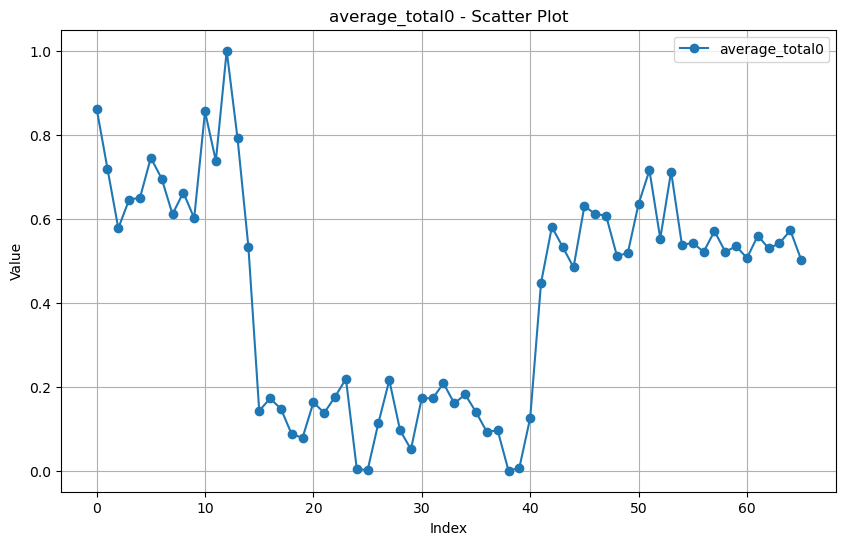

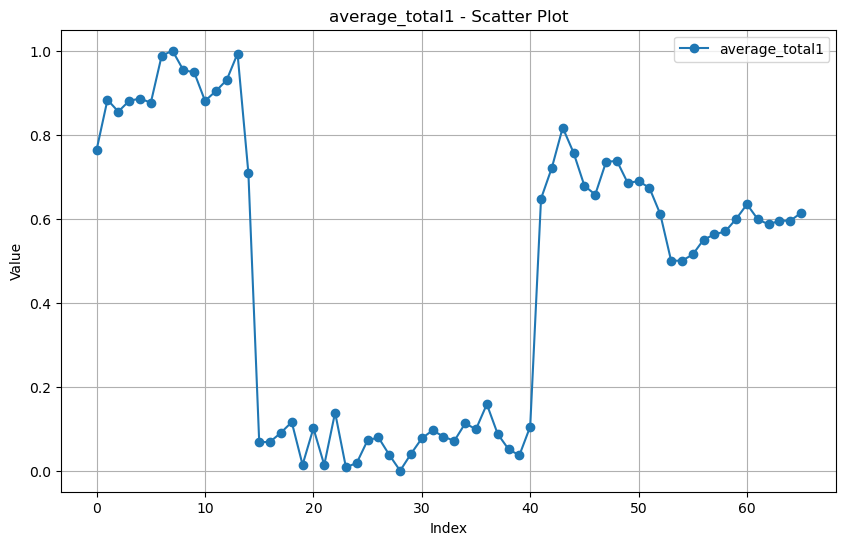

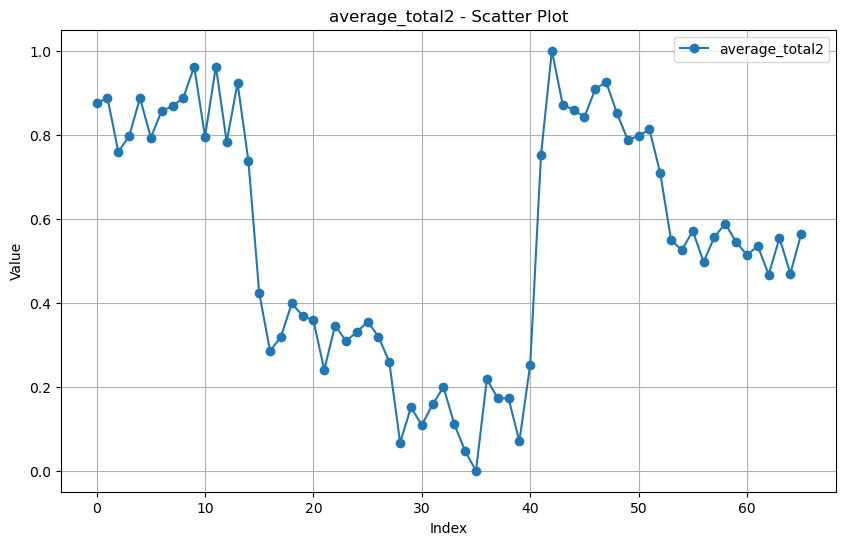

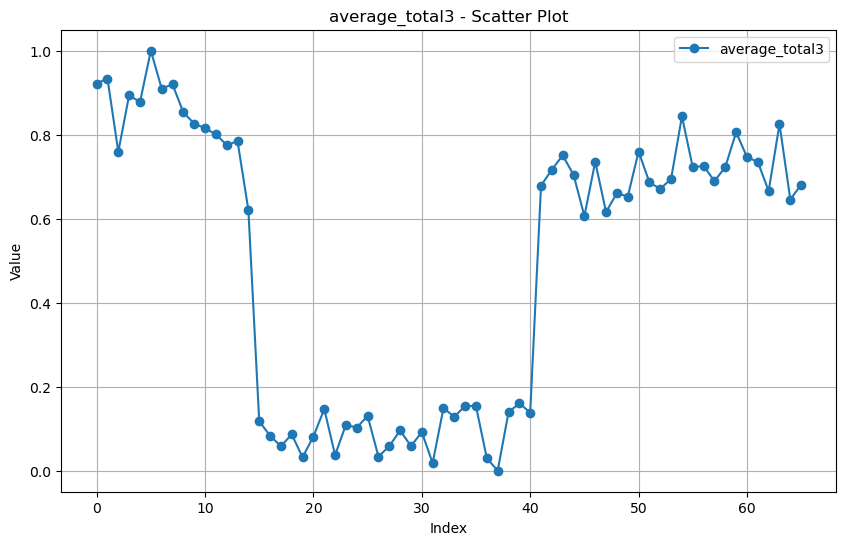

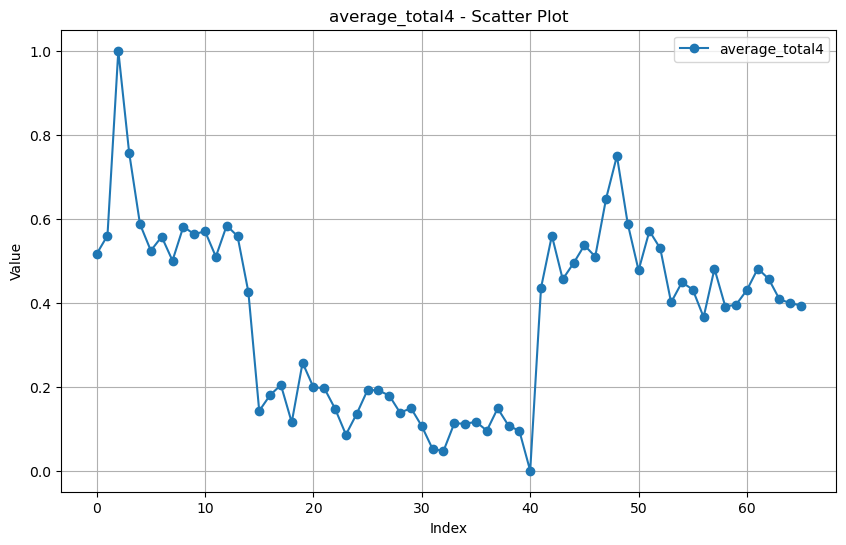

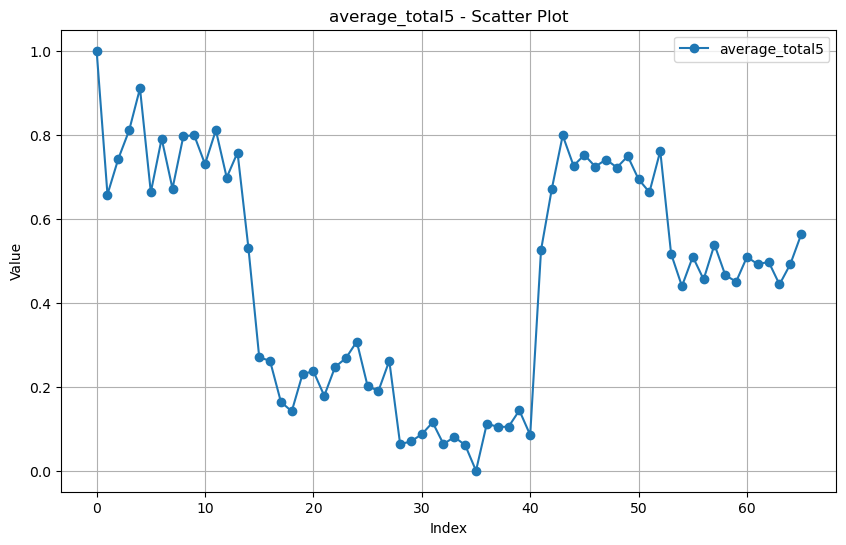

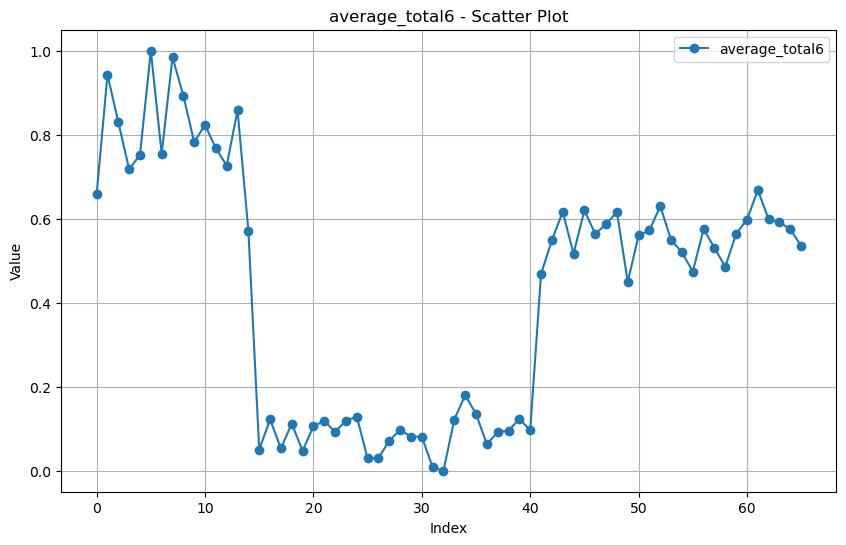

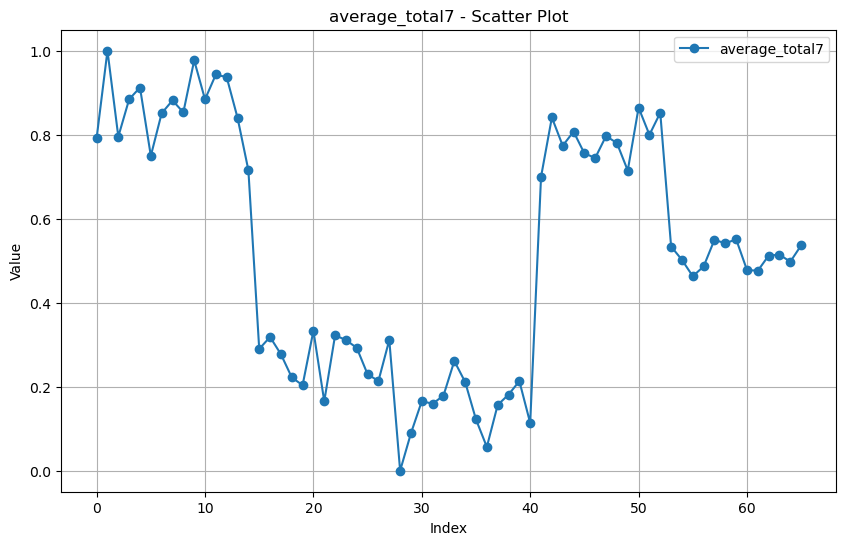

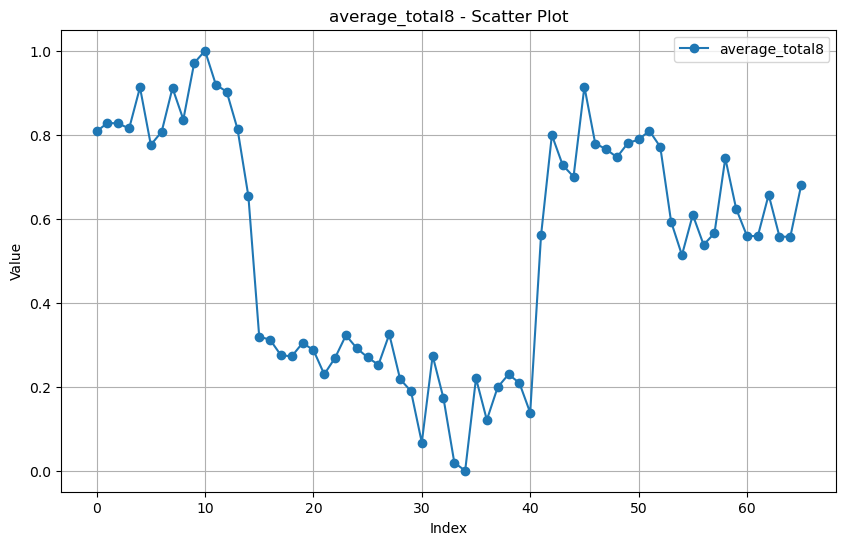

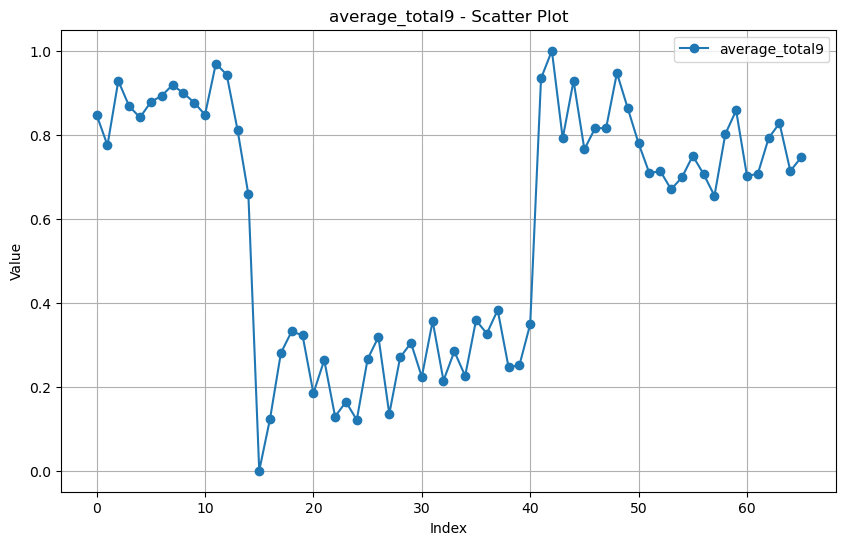

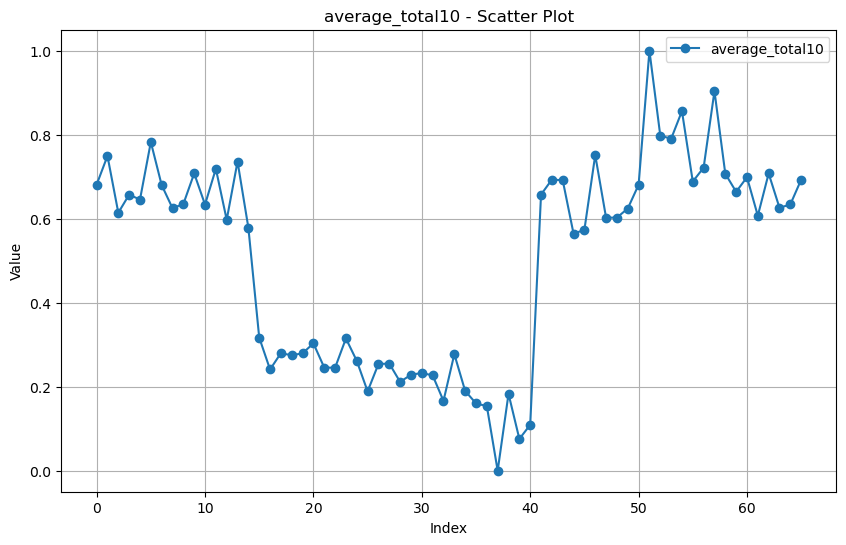

In [40]:
for column in scaled_df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(scaled_df.index, scaled_df[column], marker='o', label=column)
    plt.title(f'{column} - Scatter Plot')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

## 서울부동산

In [33]:
df_부동산=pd.read_csv('서울부동산10년치.csv')
df_부동산=df_부동산.iloc[:,0:4]
df_부동산=df_부동산.iloc[:-1,:]
df_부동산

,날짜,매매가격지수증감률,전세거래활발지수,전세가격변동률
0,14.05.12,-0.013997,20.451064,0.040087
1,14.05.19,-0.038623,21.018912,0.017144
2,14.05.26,-0.027122,19.419975,-0.001075
3,14.06.02,-0.016226,18.387873,0.023532
4,14.06.09,-0.007560,20.533195,0.025157
...,...,...,...,...
495,24.04.01,-0.061897,28.996184,0.114933
496,24.04.08,-0.019702,25.603864,0.118146
497,24.04.15,-0.007789,26.295662,0.085921
498,24.04.22,-0.009663,28.248268,0.097793


In [34]:
for i in range(len(df_부동산)):
    df_부동산.iloc[i,0]=df_부동산.iloc[i,0].replace('.','-')
    df_부동산.iloc[i,0]='20'+df_부동산.iloc[i,0]
df_부동산

,날짜,매매가격지수증감률,전세거래활발지수,전세가격변동률
0,2014-05-12,-0.013997,20.451064,0.040087
1,2014-05-19,-0.038623,21.018912,0.017144
2,2014-05-26,-0.027122,19.419975,-0.001075
3,2014-06-02,-0.016226,18.387873,0.023532
4,2014-06-09,-0.007560,20.533195,0.025157
...,...,...,...,...
495,2024-04-01,-0.061897,28.996184,0.114933
496,2024-04-08,-0.019702,25.603864,0.118146
497,2024-04-15,-0.007789,26.295662,0.085921
498,2024-04-22,-0.009663,28.248268,0.097793


In [35]:
# 열 이름 변경
df_부동산=df_부동산.rename(columns={'날짜' : 'date'})
df_부동산

,date,매매가격지수증감률,전세거래활발지수,전세가격변동률
0,2014-05-12,-0.013997,20.451064,0.040087
1,2014-05-19,-0.038623,21.018912,0.017144
2,2014-05-26,-0.027122,19.419975,-0.001075
3,2014-06-02,-0.016226,18.387873,0.023532
4,2014-06-09,-0.007560,20.533195,0.025157
...,...,...,...,...
495,2024-04-01,-0.061897,28.996184,0.114933
496,2024-04-08,-0.019702,25.603864,0.118146
497,2024-04-15,-0.007789,26.295662,0.085921
498,2024-04-22,-0.009663,28.248268,0.097793


In [36]:
df_부동산['date'] = pd.to_datetime(df_부동산['date'], format='%Y-%m-%d')
df_부동산

,date,매매가격지수증감률,전세거래활발지수,전세가격변동률
0,2014-05-12,-0.013997,20.451064,0.040087
1,2014-05-19,-0.038623,21.018912,0.017144
2,2014-05-26,-0.027122,19.419975,-0.001075
3,2014-06-02,-0.016226,18.387873,0.023532
4,2014-06-09,-0.007560,20.533195,0.025157
...,...,...,...,...
495,2024-04-01,-0.061897,28.996184,0.114933
496,2024-04-08,-0.019702,25.603864,0.118146
497,2024-04-15,-0.007789,26.295662,0.085921
498,2024-04-22,-0.009663,28.248268,0.097793


In [37]:
df_부동산['전세가격변동률*100']=df_부동산['전세가격변동률']*100
df_부동산['매매가격지수증감률*100']=df_부동산['매매가격지수증감률']*100
df_부동산

,date,매매가격지수증감률,전세거래활발지수,전세가격변동률,전세가격변동률*100,매매가격지수증감률*100
0,2014-05-12,-0.013997,20.451064,0.040087,4.008686,-1.399692
1,2014-05-19,-0.038623,21.018912,0.017144,1.714419,-3.862259
2,2014-05-26,-0.027122,19.419975,-0.001075,-0.107520,-2.712164
3,2014-06-02,-0.016226,18.387873,0.023532,2.353220,-1.622599
4,2014-06-09,-0.007560,20.533195,0.025157,2.515668,-0.755994
...,...,...,...,...,...,...
495,2024-04-01,-0.061897,28.996184,0.114933,11.493340,-6.189748
496,2024-04-08,-0.019702,25.603864,0.118146,11.814633,-1.970202
497,2024-04-15,-0.007789,26.295662,0.085921,8.592102,-0.778864
498,2024-04-22,-0.009663,28.248268,0.097793,9.779294,-0.966256


## 데이터 합치기

In [38]:
data=pd.merge(merged_df,df_부동산,on='date',how='left')
data

,date,total0,total1,total2,total3,total4,total5,total6,total7,total8,...,average_total6,average_total7,average_total8,average_total9,average_total10,매매가격지수증감률,전세거래활발지수,전세가격변동률,전세가격변동률*100,매매가격지수증감률*100
0,2022-01-03,42.067928,32.360496,22.872173,53.134028,20.198377,58.871654,16.750276,8.755745,24.709689,...,0.030455,0.015920,0.044927,0.028926,0.025348,0.050725,7.059524,0.075674,7.567397,5.072512
1,2022-01-10,98.271322,149.476674,79.469488,183.059450,84.049811,84.697347,112.774680,51.879674,88.253091,...,0.060992,0.028058,0.047730,0.021965,0.032476,0.032388,8.809262,0.055244,5.524350,3.238833
2,2022-01-17,67.594357,170.422917,64.453565,143.974520,299.330293,137.452494,110.204312,36.311010,107.053012,...,0.048914,0.016117,0.047516,0.036708,0.018364,0.033500,9.908207,0.048231,4.823132,3.350038
3,2022-01-24,86.609101,169.081576,68.950402,191.569157,178.111092,153.857568,77.551245,44.831870,96.582467,...,0.036859,0.021308,0.045904,0.030918,0.022856,0.026439,9.956578,0.030708,3.070786,2.643854
4,2022-01-31,70.815105,137.759602,72.715892,148.318635,86.101498,153.961665,68.578377,38.824807,100.226793,...,0.040531,0.022946,0.059236,0.028327,0.021635,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2023-03-06,54.270474,56.217168,6.769294,118.000208,59.627168,32.125578,63.044303,-5.043165,21.853866,...,0.031538,-0.002523,0.010932,0.015437,0.017620,-0.303238,17.967889,-0.448627,-44.862741,-30.323756
62,2023-03-13,46.800235,54.608896,-8.939876,95.191577,52.693473,36.166096,50.833778,-0.875028,51.429152,...,0.024092,-0.000415,0.024374,0.023615,0.028126,-0.287415,16.727942,-0.435750,-43.575017,-28.741532
63,2023-03-20,51.551469,58.620659,11.856678,164.477507,32.554726,15.984937,49.698821,-0.627392,22.892973,...,0.023322,-0.000294,0.010743,0.027033,0.019592,-0.277560,18.116969,-0.343809,-34.380859,-27.756002
64,2023-03-27,69.475167,65.443560,-9.466157,97.640420,32.148063,38.439792,51.279026,-3.015006,25.480416,...,0.021555,-0.001267,0.010711,0.016099,0.020426,-0.256353,16.860090,-0.327441,-32.744058,-25.635310


In [39]:
data[data['매매가격지수증감률'].isnull()==True]

,date,total0,total1,total2,total3,total4,total5,total6,total7,total8,...,average_total6,average_total7,average_total8,average_total9,average_total10,매매가격지수증감률,전세거래활발지수,전세가격변동률,전세가격변동률*100,매매가격지수증감률*100
4,2022-01-31,70.815105,137.759602,72.715892,148.318635,86.101498,153.961665,68.578377,38.824807,100.226793,...,0.040531,0.022946,0.059236,0.028327,0.021635,NaN,NaN,NaN,NaN,NaN
36,2022-09-12,-66.997234,-73.031202,-44.001130,-113.276466,-63.932760,-70.723307,-45.509177,-36.906148,-66.680818,...,-0.033316,-0.027018,-0.048815,-0.021099,-0.029707,NaN,NaN,NaN,NaN,NaN
55,2023-01-23,39.087964,20.197502,11.899618,90.423404,31.857683,30.947319,17.250005,-5.276875,28.589560,...,0.010761,-0.003292,0.017835,0.019562,0.026112,NaN,NaN,NaN,NaN,NaN


In [40]:
data=data.dropna(how='any')
data

,date,total0,total1,total2,total3,total4,total5,total6,total7,total8,...,average_total6,average_total7,average_total8,average_total9,average_total10,매매가격지수증감률,전세거래활발지수,전세가격변동률,전세가격변동률*100,매매가격지수증감률*100
0,2022-01-03,42.067928,32.360496,22.872173,53.134028,20.198377,58.871654,16.750276,8.755745,24.709689,...,0.030455,0.015920,0.044927,0.028926,0.025348,0.050725,7.059524,0.075674,7.567397,5.072512
1,2022-01-10,98.271322,149.476674,79.469488,183.059450,84.049811,84.697347,112.774680,51.879674,88.253091,...,0.060992,0.028058,0.047730,0.021965,0.032476,0.032388,8.809262,0.055244,5.524350,3.238833
2,2022-01-17,67.594357,170.422917,64.453565,143.974520,299.330293,137.452494,110.204312,36.311010,107.053012,...,0.048914,0.016117,0.047516,0.036708,0.018364,0.033500,9.908207,0.048231,4.823132,3.350038
3,2022-01-24,86.609101,169.081576,68.950402,191.569157,178.111092,153.857568,77.551245,44.831870,96.582467,...,0.036859,0.021308,0.045904,0.030918,0.022856,0.026439,9.956578,0.030708,3.070786,2.643854
5,2022-02-07,76.205120,105.650790,43.022206,149.156081,50.876723,62.088641,89.149819,17.856496,53.882170,...,0.067131,0.013446,0.040574,0.031873,0.035930,0.020000,9.862138,0.013768,1.376846,2.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2023-03-06,54.270474,56.217168,6.769294,118.000208,59.627168,32.125578,63.044303,-5.043165,21.853866,...,0.031538,-0.002523,0.010932,0.015437,0.017620,-0.303238,17.967889,-0.448627,-44.862741,-30.323756
62,2023-03-13,46.800235,54.608896,-8.939876,95.191577,52.693473,36.166096,50.833778,-0.875028,51.429152,...,0.024092,-0.000415,0.024374,0.023615,0.028126,-0.287415,16.727942,-0.435750,-43.575017,-28.741532
63,2023-03-20,51.551469,58.620659,11.856678,164.477507,32.554726,15.984937,49.698821,-0.627392,22.892973,...,0.023322,-0.000294,0.010743,0.027033,0.019592,-0.277560,18.116969,-0.343809,-34.380859,-27.756002
64,2023-03-27,69.475167,65.443560,-9.466157,97.640420,32.148063,38.439792,51.279026,-3.015006,25.480416,...,0.021555,-0.001267,0.010711,0.016099,0.020426,-0.256353,16.860090,-0.327441,-32.744058,-25.635310


In [41]:
data.loc[:,'전가변*100']=data.loc[:,'전세가격변동률*100']
data

C:\Users\USER\AppData\Local\Temp\ipykernel_28332\3410968012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'전가변*100']=data.loc[:,'전세가격변동률*100']


,date,total0,total1,total2,total3,total4,total5,total6,total7,total8,...,average_total7,average_total8,average_total9,average_total10,매매가격지수증감률,전세거래활발지수,전세가격변동률,전세가격변동률*100,매매가격지수증감률*100,전가변*100
0,2022-01-03,42.067928,32.360496,22.872173,53.134028,20.198377,58.871654,16.750276,8.755745,24.709689,...,0.015920,0.044927,0.028926,0.025348,0.050725,7.059524,0.075674,7.567397,5.072512,7.567397
1,2022-01-10,98.271322,149.476674,79.469488,183.059450,84.049811,84.697347,112.774680,51.879674,88.253091,...,0.028058,0.047730,0.021965,0.032476,0.032388,8.809262,0.055244,5.524350,3.238833,5.524350
2,2022-01-17,67.594357,170.422917,64.453565,143.974520,299.330293,137.452494,110.204312,36.311010,107.053012,...,0.016117,0.047516,0.036708,0.018364,0.033500,9.908207,0.048231,4.823132,3.350038,4.823132
3,2022-01-24,86.609101,169.081576,68.950402,191.569157,178.111092,153.857568,77.551245,44.831870,96.582467,...,0.021308,0.045904,0.030918,0.022856,0.026439,9.956578,0.030708,3.070786,2.643854,3.070786
5,2022-02-07,76.205120,105.650790,43.022206,149.156081,50.876723,62.088641,89.149819,17.856496,53.882170,...,0.013446,0.040574,0.031873,0.035930,0.020000,9.862138,0.013768,1.376846,2.000049,1.376846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2023-03-06,54.270474,56.217168,6.769294,118.000208,59.627168,32.125578,63.044303,-5.043165,21.853866,...,-0.002523,0.010932,0.015437,0.017620,-0.303238,17.967889,-0.448627,-44.862741,-30.323756,-44.862741
62,2023-03-13,46.800235,54.608896,-8.939876,95.191577,52.693473,36.166096,50.833778,-0.875028,51.429152,...,-0.000415,0.024374,0.023615,0.028126,-0.287415,16.727942,-0.435750,-43.575017,-28.741532,-43.575017
63,2023-03-20,51.551469,58.620659,11.856678,164.477507,32.554726,15.984937,49.698821,-0.627392,22.892973,...,-0.000294,0.010743,0.027033,0.019592,-0.277560,18.116969,-0.343809,-34.380859,-27.756002,-34.380859
64,2023-03-27,69.475167,65.443560,-9.466157,97.640420,32.148063,38.439792,51.279026,-3.015006,25.480416,...,-0.001267,0.010711,0.016099,0.020426,-0.256353,16.860090,-0.327441,-32.744058,-25.635310,-32.744058


In [42]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data

C:\Users\USER\AppData\Local\Temp\ipykernel_28332\6424245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('index',axis=1,inplace=True)


,date,total0,total1,total2,total3,total4,total5,total6,total7,total8,...,average_total7,average_total8,average_total9,average_total10,매매가격지수증감률,전세거래활발지수,전세가격변동률,전세가격변동률*100,매매가격지수증감률*100,전가변*100
0,2022-01-03,42.067928,32.360496,22.872173,53.134028,20.198377,58.871654,16.750276,8.755745,24.709689,...,0.015920,0.044927,0.028926,0.025348,0.050725,7.059524,0.075674,7.567397,5.072512,7.567397
1,2022-01-10,98.271322,149.476674,79.469488,183.059450,84.049811,84.697347,112.774680,51.879674,88.253091,...,0.028058,0.047730,0.021965,0.032476,0.032388,8.809262,0.055244,5.524350,3.238833,5.524350
2,2022-01-17,67.594357,170.422917,64.453565,143.974520,299.330293,137.452494,110.204312,36.311010,107.053012,...,0.016117,0.047516,0.036708,0.018364,0.033500,9.908207,0.048231,4.823132,3.350038,4.823132
3,2022-01-24,86.609101,169.081576,68.950402,191.569157,178.111092,153.857568,77.551245,44.831870,96.582467,...,0.021308,0.045904,0.030918,0.022856,0.026439,9.956578,0.030708,3.070786,2.643854,3.070786
4,2022-02-07,76.205120,105.650790,43.022206,149.156081,50.876723,62.088641,89.149819,17.856496,53.882170,...,0.013446,0.040574,0.031873,0.035930,0.020000,9.862138,0.013768,1.376846,2.000049,1.376846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2023-03-06,54.270474,56.217168,6.769294,118.000208,59.627168,32.125578,63.044303,-5.043165,21.853866,...,-0.002523,0.010932,0.015437,0.017620,-0.303238,17.967889,-0.448627,-44.862741,-30.323756,-44.862741
59,2023-03-13,46.800235,54.608896,-8.939876,95.191577,52.693473,36.166096,50.833778,-0.875028,51.429152,...,-0.000415,0.024374,0.023615,0.028126,-0.287415,16.727942,-0.435750,-43.575017,-28.741532,-43.575017
60,2023-03-20,51.551469,58.620659,11.856678,164.477507,32.554726,15.984937,49.698821,-0.627392,22.892973,...,-0.000294,0.010743,0.027033,0.019592,-0.277560,18.116969,-0.343809,-34.380859,-27.756002,-34.380859
61,2023-03-27,69.475167,65.443560,-9.466157,97.640420,32.148063,38.439792,51.279026,-3.015006,25.480416,...,-0.001267,0.010711,0.016099,0.020426,-0.256353,16.860090,-0.327441,-32.744058,-25.635310,-32.744058


In [43]:
data.columns

Index(['date', 'total0', 'total1', 'total2', 'total3', 'total4', 'total5',
       'total6', 'total7', 'total8', 'total9', 'total10', 'weekly_count',
       'average_total0', 'average_total1', 'average_total2', 'average_total3',
       'average_total4', 'average_total5', 'average_total6', 'average_total7',
       'average_total8', 'average_total9', 'average_total10', '매매가격지수증감률',
       '전세거래활발지수', '전세가격변동률', '전세가격변동률*100', '매매가격지수증감률*100', '전가변*100'],
      dtype='object')

In [44]:
df_lstm=data.loc[:,['average_total0', 'average_total1', 'average_total2', 'average_total3',
       'average_total4', 'average_total5', 'average_total6', 'average_total7',
       'average_total8', 'average_total9', 'average_total10','매매가격지수증감률*100','전세가격변동률*100','전가변*100']]
df_lstm

,average_total0,average_total1,average_total2,average_total3,average_total4,average_total5,average_total6,average_total7,average_total8,average_total9,average_total10,매매가격지수증감률*100,전세가격변동률*100,전가변*100
0,0.076487,0.058837,0.041586,0.096607,0.036724,0.107039,0.030455,0.015920,0.044927,0.028926,0.025348,5.072512,7.567397,7.567397
1,0.053148,0.080842,0.042980,0.099005,0.045457,0.045807,0.060992,0.028058,0.047730,0.021965,0.032476,3.238833,5.524350,5.524350
2,0.030002,0.075643,0.028608,0.063903,0.132859,0.061009,0.048914,0.016117,0.047516,0.036708,0.018364,3.350038,4.823132,4.823132
3,0.041164,0.080362,0.032771,0.091050,0.084654,0.073126,0.036859,0.021308,0.045904,0.030918,0.022856,2.643854,3.070786,3.070786
4,0.057383,0.079556,0.032396,0.112316,0.038311,0.046753,0.067131,0.013446,0.040574,0.031873,0.035930,2.000049,1.376846,1.376846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.027149,0.028123,0.003386,0.059030,0.029828,0.016071,0.031538,-0.002523,0.010932,0.015437,0.017620,-30.323756,-44.862741,-44.862741
59,0.022180,0.025881,-0.004237,0.045114,0.024973,0.017140,0.024092,-0.000415,0.024374,0.023615,0.028126,-28.741532,-43.575017,-43.575017
60,0.024191,0.027509,0.005564,0.077183,0.015277,0.007501,0.023322,-0.000294,0.010743,0.027033,0.019592,-27.756002,-34.380859,-34.380859
61,0.029204,0.027509,-0.003979,0.041043,0.013513,0.016158,0.021555,-0.001267,0.010711,0.016099,0.020426,-25.635310,-32.744058,-32.744058


In [45]:
df_lstm.describe()

,average_total0,average_total1,average_total2,average_total3,average_total4,average_total5,average_total6,average_total7,average_total8,average_total9,average_total10,매매가격지수증감률*100,전세가격변동률*100,전가변*100
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.004573,0.004172,0.004263,0.010788,0.007450,0.009899,0.005935,0.000313,0.007955,0.004184,0.006888,-13.364551,-24.193277,-24.193277
std,0.043118,0.064724,0.032868,0.067943,0.042598,0.048719,0.032406,0.016826,0.038068,0.028609,0.025771,17.768402,34.313288,34.313288
min,-0.064126,-0.082792,-0.056694,-0.088864,-0.065757,-0.071816,-0.040093,-0.030321,-0.065309,-0.052485,-0.045750,-54.148188,-119.459889,-119.459889
25%,-0.037800,-0.067163,-0.021438,-0.064120,-0.036209,-0.036802,-0.028392,-0.015996,-0.028048,-0.025362,-0.019172,-30.121633,-44.218879,-44.218879
50%,0.020823,0.027509,0.004455,0.045114,0.015277,0.016158,0.017293,-0.000294,0.011157,0.015437,0.017620,-3.826761,-4.207519,-4.207519
75%,0.035217,0.053681,0.033726,0.063951,0.038833,0.057494,0.026213,0.016160,0.041710,0.028936,0.026592,2.107600,1.872450,1.872450
max,0.098946,0.102496,0.055638,0.112316,0.132859,0.107039,0.067131,0.028058,0.071164,0.043605,0.058630,5.284299,7.567397,7.567397


C:\Users\USER\Anaconda_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\Anaconda_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\Anaconda_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\Anaconda_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\Anaconda_\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\Anaconda_\lib\sit

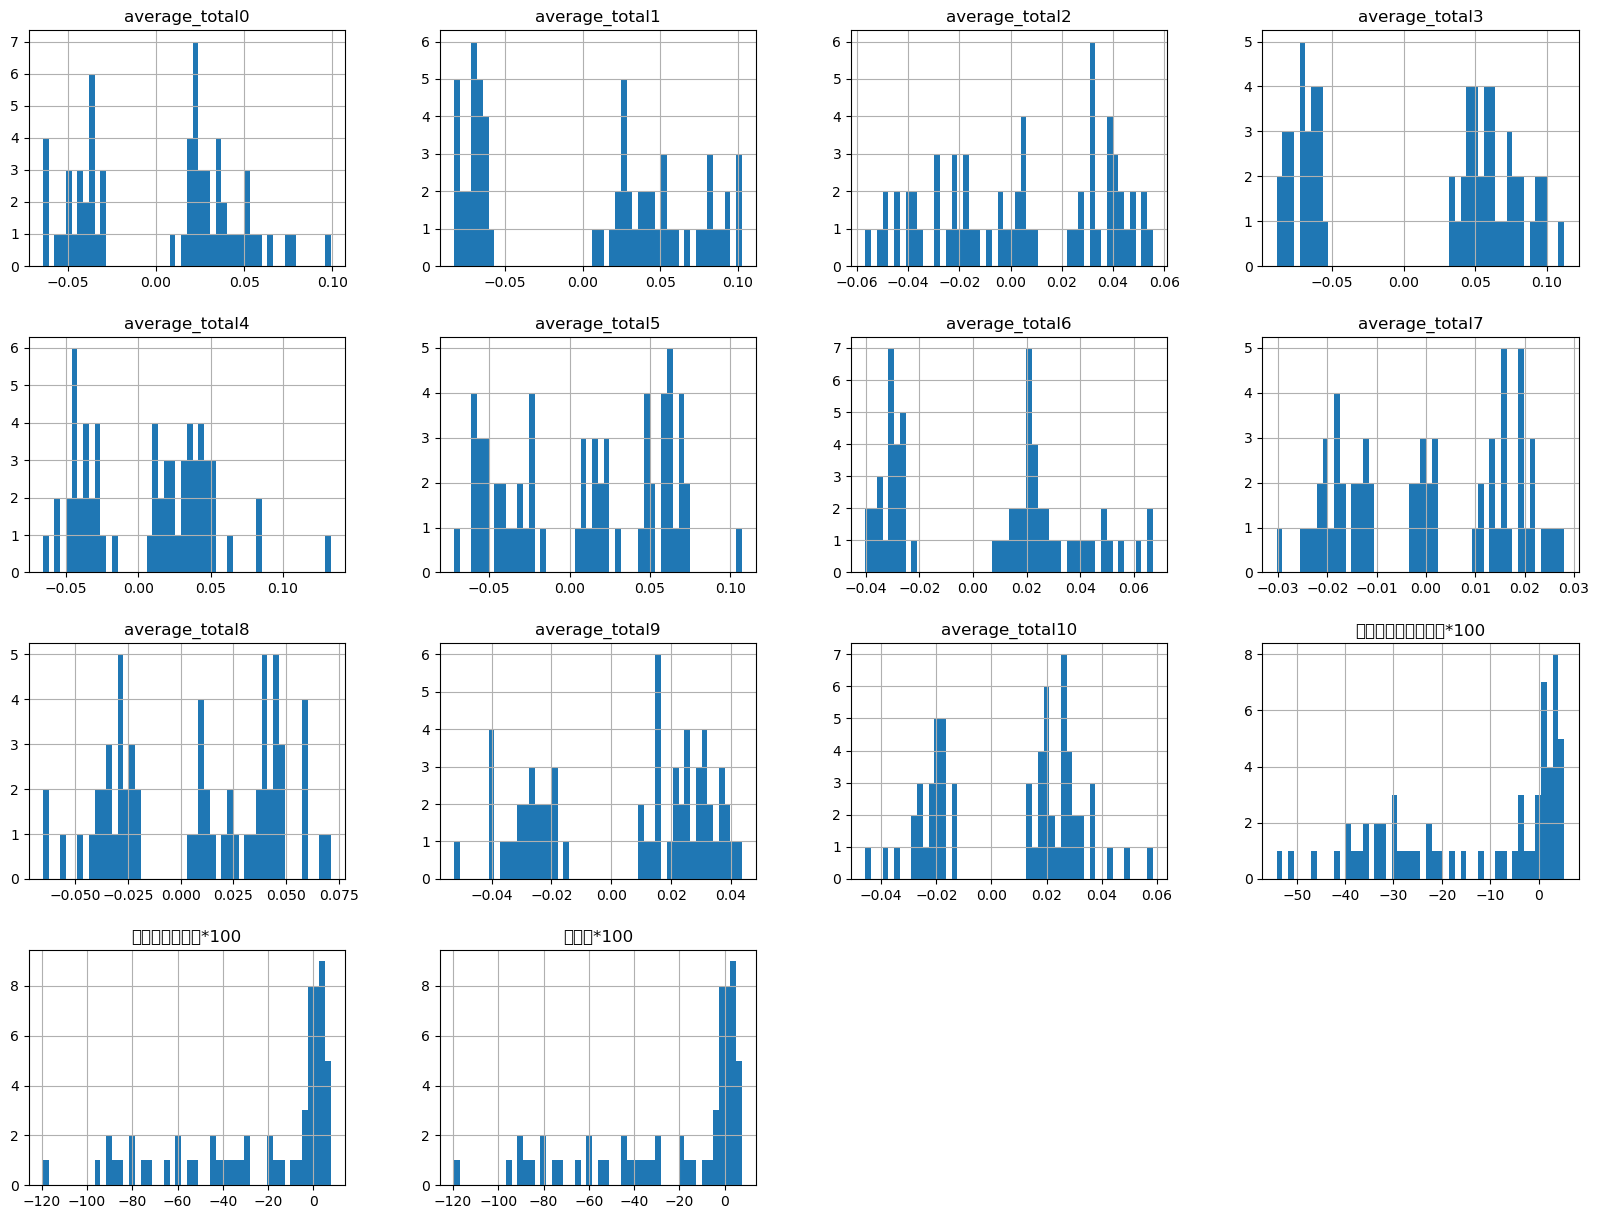

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임의 각 열에 대한 히스토그램 생성
df_lstm.hist(bins=50, figsize=(20, 15))
plt.show()


## MinMax Scaler 사용한 전처리

In [49]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# MinMaxScaler 초기화
scaler = MinMaxScaler()

# 데이터프레임의 수치형 데이터에 대해 스케일링 적용
scaled_data = scaler.fit_transform(df_lstm)

# 스케일된 데이터를 다시 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=df_lstm.columns)

# 결과 출력
scaled_df

,average_total0,average_total1,average_total2,average_total3,average_total4,average_total5,average_total6,average_total7,average_total8,average_total9,average_total10,매매가격지수증감률*100,전세가격변동률*100,전가변*100
0,0.862277,0.764372,0.874905,0.921916,0.515979,1.000000,0.657952,0.792071,0.807749,0.847239,0.681141,0.996437,1.000000,1.000000
1,0.719157,0.883131,0.887314,0.933832,0.559946,0.657643,0.942750,1.000000,0.828292,0.774789,0.749435,0.965583,0.983916,0.983916
2,0.577218,0.855071,0.759374,0.759356,1.000000,0.742637,0.830109,0.795449,0.826721,0.928226,0.614237,0.967454,0.978396,0.978396
3,0.645667,0.880541,0.796435,0.894292,0.757295,0.810388,0.717676,0.884371,0.814912,0.867964,0.657269,0.955572,0.964601,0.964601
4,0.745128,0.876193,0.793098,1.000000,0.523967,0.662935,1.000000,0.749703,0.775854,0.877904,0.782523,0.944740,0.951266,0.951266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.559722,0.598606,0.534848,0.735130,0.481260,0.491384,0.668051,0.476164,0.558656,0.706854,0.607108,0.400865,0.587253,0.587253
59,0.529253,0.586508,0.466984,0.665963,0.456814,0.497364,0.598607,0.512275,0.657149,0.791964,0.707757,0.427488,0.597390,0.597390
60,0.541585,0.595291,0.554233,0.825365,0.407994,0.443470,0.591426,0.514335,0.557267,0.827538,0.625995,0.444070,0.669770,0.669770
61,0.572322,0.595293,0.469280,0.645723,0.399115,0.491872,0.574946,0.497670,0.557030,0.713743,0.633986,0.479752,0.682655,0.682655


In [50]:
scaled_df.describe()

,average_total0,average_total1,average_total2,average_total3,average_total4,average_total5,average_total6,average_total7,average_total8,average_total9,average_total10,매매가격지수증감률*100,전세가격변동률*100,전가변*100
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.421281,0.469343,0.542651,0.495340,0.368588,0.456877,0.429268,0.524737,0.536842,0.589750,0.504290,0.686218,0.749970,0.749970
std,0.264409,0.349316,0.292595,0.337721,0.214475,0.272393,0.302225,0.288225,0.278940,0.297735,0.246900,0.298968,0.270125,0.270125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.161437,0.084351,0.313855,0.122994,0.148772,0.195767,0.109131,0.245384,0.273026,0.282263,0.254627,0.404266,0.592322,0.592322
50%,0.520930,0.595291,0.544359,0.665963,0.407994,0.491872,0.535201,0.514335,0.560303,0.706854,0.607108,0.846699,0.907304,0.907304
75%,0.609197,0.736546,0.804932,0.759594,0.526596,0.722987,0.618390,0.796192,0.784175,0.847345,0.693059,0.946549,0.955168,0.955168
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df_lstm=scaled_df
df_lstm

,average_total0,average_total1,average_total2,average_total3,average_total4,average_total5,average_total6,average_total7,average_total8,average_total9,average_total10,매매가격지수증감률*100,전세가격변동률*100,전가변*100
0,0.862277,0.764372,0.874905,0.921916,0.515979,1.000000,0.657952,0.792071,0.807749,0.847239,0.681141,0.996437,1.000000,1.000000
1,0.719157,0.883131,0.887314,0.933832,0.559946,0.657643,0.942750,1.000000,0.828292,0.774789,0.749435,0.965583,0.983916,0.983916
2,0.577218,0.855071,0.759374,0.759356,1.000000,0.742637,0.830109,0.795449,0.826721,0.928226,0.614237,0.967454,0.978396,0.978396
3,0.645667,0.880541,0.796435,0.894292,0.757295,0.810388,0.717676,0.884371,0.814912,0.867964,0.657269,0.955572,0.964601,0.964601
4,0.745128,0.876193,0.793098,1.000000,0.523967,0.662935,1.000000,0.749703,0.775854,0.877904,0.782523,0.944740,0.951266,0.951266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.559722,0.598606,0.534848,0.735130,0.481260,0.491384,0.668051,0.476164,0.558656,0.706854,0.607108,0.400865,0.587253,0.587253
59,0.529253,0.586508,0.466984,0.665963,0.456814,0.497364,0.598607,0.512275,0.657149,0.791964,0.707757,0.427488,0.597390,0.597390
60,0.541585,0.595291,0.554233,0.825365,0.407994,0.443470,0.591426,0.514335,0.557267,0.827538,0.625995,0.444070,0.669770,0.669770
61,0.572322,0.595293,0.469280,0.645723,0.399115,0.491872,0.574946,0.497670,0.557030,0.713743,0.633986,0.479752,0.682655,0.682655


In [71]:
df_lstm.to_csv('코랩에넣을거.csv',index=False)

In [52]:
X=df_lstm.iloc[:,:-1]
X=np.array(X)

In [53]:
X.shape

(63, 13)

In [54]:
Y=df_lstm.iloc[:,-1]
Y=np.array(Y)

In [55]:
Y

array([1.        , 0.98391647, 0.97839625, 0.96460122, 0.95126597,
       0.95339706, 0.92317281, 0.93800293, 0.93671851, 0.94648544,
       0.95196721, 0.94531959, 0.94823087, 0.96730099, 0.9767915 ,
       0.97065646, 0.97081388, 0.99466491, 0.99314997, 0.9877692 ,
       0.97770029, 0.9699699 , 0.956938  , 0.97743513, 0.957598  ,
       0.93948533, 0.93623419, 0.92934055, 0.92228461, 0.92952304,
       0.90249388, 0.90771818, 0.90730404, 0.87721121, 0.88647584,
       0.79964098, 0.82622595, 0.79682687, 0.8150867 , 0.70258833,
       0.6594829 , 0.61496073, 0.5139596 , 0.47398985, 0.34633173,
       0.36119017, 0.24128168, 0.19326075, 0.23423077, 0.23155438,
       0.42346478, 0.30776698, 0.31814712, 0.        , 0.26064713,
       0.47313862, 0.5280089 , 0.62658582, 0.58725294, 0.59739033,
       0.66976972, 0.68265515, 0.70231702])

## sequence length=1

In [56]:
# 시퀀스 길이와 특징 수를 고려하여 데이터 재구성
sequence_length = 1
num_samples = len(X) - sequence_length

X_reshaped = np.array([X[i:i + sequence_length] for i in range(num_samples)])
Y_reshaped = np.array([Y[i + sequence_length] for i in range(num_samples)])

print("Shape of X_reshaped:", X_reshaped.shape)  
print("Shape of Y_reshaped:", Y_reshaped.shape)  

Shape of X_reshaped: (62, 1, 13)
Shape of Y_reshaped: (62,)


In [57]:
X_reshaped

array([[[0.86227665, 0.76437239, 0.87490464, 0.92191591, 0.51597916,
         1.        , 0.65795175, 0.79207105, 0.80774925, 0.84723878,
         0.68114112, 0.99643651, 1.        ]],

       [[0.71915747, 0.88313122, 0.88731373, 0.93383181, 0.55994634,
         0.65764338, 0.94274955, 1.        , 0.82829166, 0.77478899,
         0.74943498, 0.96558336, 0.98391647]],

       [[0.57721783, 0.85507097, 0.75937358, 0.75935623, 1.        ,
         0.74263695, 0.83010908, 0.795449  , 0.82672055, 0.92822587,
         0.61423714, 0.96745448, 0.97839625]],

       [[0.64566652, 0.88054102, 0.79643517, 0.89429225, 0.75729542,
         0.81038767, 0.71767624, 0.88437104, 0.81491193, 0.86796397,
         0.65726944, 0.95557236, 0.96460122]],

       [[0.74512761, 0.87619294, 0.79309808, 1.        , 0.52396675,
         0.66293472, 1.        , 0.74970348, 0.77585421, 0.8779039 ,
         0.78252323, 0.94473981, 0.95126597]],

       [[0.69549755, 0.98810115, 0.85667187, 0.9100327 , 0.55713076,
 

In [58]:
Y_reshaped

array([0.98391647, 0.97839625, 0.96460122, 0.95126597, 0.95339706,
       0.92317281, 0.93800293, 0.93671851, 0.94648544, 0.95196721,
       0.94531959, 0.94823087, 0.96730099, 0.9767915 , 0.97065646,
       0.97081388, 0.99466491, 0.99314997, 0.9877692 , 0.97770029,
       0.9699699 , 0.956938  , 0.97743513, 0.957598  , 0.93948533,
       0.93623419, 0.92934055, 0.92228461, 0.92952304, 0.90249388,
       0.90771818, 0.90730404, 0.87721121, 0.88647584, 0.79964098,
       0.82622595, 0.79682687, 0.8150867 , 0.70258833, 0.6594829 ,
       0.61496073, 0.5139596 , 0.47398985, 0.34633173, 0.36119017,
       0.24128168, 0.19326075, 0.23423077, 0.23155438, 0.42346478,
       0.30776698, 0.31814712, 0.        , 0.26064713, 0.47313862,
       0.5280089 , 0.62658582, 0.58725294, 0.59739033, 0.66976972,
       0.68265515, 0.70231702])

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.optimizers import Adam
import shap
tf.compat.v1.disable_v2_behavior()

class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, neurons=16, optimizer='adam', epochs=100, batch_size=5):
        self.neurons = neurons
        self.optimizer = optimizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self, input_shape):
        self.model = Sequential()
        self.model.add(LSTM(self.neurons, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
        # 첫 번째 LSTM 레이어, 시퀀스 반환 활성화
        # 첫 번째 Dropout 레이어
        self.model.add(Dropout(0.1))
        self.model.add(LSTM(self.neurons, activation='relu'))
        # 두 번째 Dropout 레이어
        self.model.add(Dropout(0.1))
        self.model.add(Dense(1))
        self.model.compile(optimizer=self.optimizer, loss='mean_squared_error')

    def fit(self, X, y):
        if self.model is None:
            self.build_model(X.shape[1:])
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        mse = self.model.evaluate(X, y, verbose=0)
        return -mse  # Negative MSE because Scikit-Learn maximizes the score

# 데이터와 TimeSeriesSplit 설정
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

param_grid = {
    'neurons': [16,32,64,128],
    'batch_size': [5,10,15],
    'epochs': [50,100,200],
    'optimizer': ['adam']
}
#'rmsprop'
all_y_pred = []
all_y_true = []
fold_indices = []
scores = []
# 각 폴드별로 summary plot을 저장하기 위한 리스트
summary_plots = []
# SHAP bar plot을 저장할 리스트 초기화
shap_bar_plots = []

# 각 구간별로 모델 학습 및 평가
for fold, (train_index, test_index) in enumerate(tscv.split(X_reshaped)):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = Y_reshaped[train_index], Y_reshaped[test_index]
    
    model = KerasRegressor()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test).flatten()
    mse = best_model.score(X_test, y_test)
    rmse = np.sqrt(-mse)

    scores.append(rmse)
    all_y_pred.extend(y_pred)
    all_y_true.extend(y_test.flatten())
    fold_indices.append(len(all_y_true))

    # SHAP value 계산 및 시각화
    explainer = shap.DeepExplainer(best_model.model, X_train)
    shap_values = explainer.shap_values(X_test)
    print(shap_values)
    # shap_values가 리스트인 경우 각 출력별로 처리
    if isinstance(shap_values, list):
        shap_values = shap_values[0]
    print(shap_values)
    
    # 타임스텝 차원을 평균내어 2차원 데이터 생성
    shap_values_mean = np.mean(shap_values, axis=1)
    print(shap_values_mean)
    X_test_mean = np.mean(X_test, axis=1)
    print(X_test_mean)

# summary plot을 저장
    summary_plots.append((shap_values_mean, X_test_mean, fold + 1))
    # SHAP bar plot 데이터 저장
    shap_bar_plots.append((shap_values_mean, X_test_mean, fold + 1))

# 학습이 끝난 후 모든 폴드의 summary plot을 출력
for shap_values_mean, X_test_mean, fold in summary_plots:
    plt.figure()
    shap.summary_plot(shap_values_mean, X_test_mean, show=False)
    plt.title(f'SHAP Summary Plot - Fold {fold}')
    plt.show()
# 학습이 끝난 후 모든 폴드의 SHAP bar plot 출력
for shap_values_mean, X_test, fold in shap_bar_plots:
    plt.figure()
    shap.summary_plot(shap_values_mean, X_test, plot_type="bar", show=False)
    plt.title(f'SHAP Bar Plot - Fold {fold}')
    plt.show()

# 그래프 그리기
plt.figure(figsize=(15, 7))
plt.plot(all_y_true, label='Actual Values', color='blue')
plt.plot(all_y_pred, label='Predicted Values', color='green')
plt.xticks(np.arange(0, len(all_y_true), 1))
for index in fold_indices:
    plt.axvline(x=index, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(np.array(all_y_true) - np.array(all_y_pred), color='red', label='Prediction Errors')
plt.hlines(0, 0, len(all_y_true), colors='black', linestyles='dashed', label='Zero Error Line')
plt.xticks(np.arange(0, len(all_y_true), 1))
plt.title('Prediction Errors Across All Folds')
plt.xlabel('Sample Index Across All Folds')
plt.ylabel('Error (Actual - Predicted)')
plt.legend()
plt.show()

print("교차검증의 손실 점수 (RMSE): ", scores)
print("평균 손실 점수 (RMSE): ", np.mean(scores))

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Calculating the prediction errors
errors = np.array(all_y_true) - np.array(all_y_pred)

# Creating a DataFrame
errors_df = pd.DataFrame(errors, columns=['Prediction Errors'])

# Saving the DataFrame to a CSV file
errors_df.to_csv('prediction_errors.csv_sequence_length=1', index=False)

print("Prediction errors have been saved to 'prediction_errors.csv_sequence_length=1'.")


## sequence_length=2

In [ ]:
# 시퀀스 길이와 특징 수를 고려하여 데이터 재구성
sequence_length = 2
num_samples = len(X) - sequence_length

X_reshaped = np.array([X[i:i + sequence_length] for i in range(num_samples)])
Y_reshaped = np.array([Y[i + sequence_length] for i in range(num_samples)])

print("Shape of X_reshaped:", X_reshaped.shape)  
print("Shape of Y_reshaped:", Y_reshaped.shape)  

In [ ]:
X_reshaped

In [ ]:
Y_reshaped

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.optimizers import Adam
import shap
tf.compat.v1.disable_v2_behavior()

class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, neurons=16, optimizer='adam', epochs=100, batch_size=5):
        self.neurons = neurons
        self.optimizer = optimizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self, input_shape):
        self.model = Sequential()
        self.model.add(LSTM(self.neurons, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
        # 첫 번째 LSTM 레이어, 시퀀스 반환 활성화
        # 첫 번째 Dropout 레이어
        self.model.add(Dropout(0.1))
        self.model.add(LSTM(self.neurons, activation='relu'))
        # 두 번째 Dropout 레이어
        self.model.add(Dropout(0.1))
        self.model.add(Dense(1))
        self.model.compile(optimizer=self.optimizer, loss='mean_squared_error')

    def fit(self, X, y):
        if self.model is None:
            self.build_model(X.shape[1:])
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        mse = self.model.evaluate(X, y, verbose=0)
        return -mse  # Negative MSE because Scikit-Learn maximizes the score

# 데이터와 TimeSeriesSplit 설정
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

param_grid = {
    'neurons': [16,32,64,128],
    'batch_size': [5,10,15],
    'epochs': [50,100,200],
    'optimizer': ['adam']
}
#'rmsprop'
all_y_pred = []
all_y_true = []
fold_indices = []
scores = []
# 각 폴드별로 summary plot을 저장하기 위한 리스트
summary_plots = []
# SHAP bar plot을 저장할 리스트 초기화
shap_bar_plots = []

# 각 구간별로 모델 학습 및 평가
for fold, (train_index, test_index) in enumerate(tscv.split(X_reshaped)):
    X_train, X_test = X_reshaped[train_index], X_reshaped[test_index]
    y_train, y_test = Y_reshaped[train_index], Y_reshaped[test_index]
    
    model = KerasRegressor()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test).flatten()
    mse = best_model.score(X_test, y_test)
    rmse = np.sqrt(-mse)

    scores.append(rmse)
    all_y_pred.extend(y_pred)
    all_y_true.extend(y_test.flatten())
    fold_indices.append(len(all_y_true))

    # SHAP value 계산 및 시각화
    explainer = shap.DeepExplainer(best_model.model, X_train)
    shap_values = explainer.shap_values(X_test)
    print(shap_values)
    # shap_values가 리스트인 경우 각 출력별로 처리
    if isinstance(shap_values, list):
        shap_values = shap_values[0]
    print(shap_values)
    
    # 타임스텝 차원을 평균내어 2차원 데이터 생성
    shap_values_mean = np.mean(shap_values, axis=1)
    print(shap_values_mean)
    X_test_mean = np.mean(X_test, axis=1)
    print(X_test_mean)

    # summary plot을 저장
    summary_plots.append((shap_values_mean, X_test_mean, fold + 1))
    # SHAP bar plot 데이터 저장
    shap_bar_plots.append((shap_values_mean, X_test_mean, fold + 1))

# 학습이 끝난 후 모든 폴드의 summary plot을 출력
for shap_values_mean, X_test_mean, fold in summary_plots:
    plt.figure()
    shap.summary_plot(shap_values_mean, X_test_mean, show=False)
    plt.title(f'SHAP Summary Plot - Fold {fold}')
    plt.show()
# 학습이 끝난 후 모든 폴드의 SHAP bar plot 출력
for shap_values_mean, X_test, fold in shap_bar_plots:
    plt.figure()
    shap.summary_plot(shap_values_mean, X_test, plot_type="bar", show=False)
    plt.title(f'SHAP Bar Plot - Fold {fold}')
    plt.show()

# 그래프 그리기
plt.figure(figsize=(15, 7))
plt.plot(all_y_true, label='Actual Values', color='blue')
plt.plot(all_y_pred, label='Predicted Values', color='green')
plt.xticks(np.arange(0, len(all_y_true), 1))
for index in fold_indices:
    plt.axvline(x=index, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(np.array(all_y_true) - np.array(all_y_pred), color='red', label='Prediction Errors')
plt.hlines(0, 0, len(all_y_true), colors='black', linestyles='dashed', label='Zero Error Line')
plt.xticks(np.arange(0, len(all_y_true), 1))
plt.title('Prediction Errors Across All Folds')
plt.xlabel('Sample Index Across All Folds')
plt.ylabel('Error (Actual - Predicted)')
plt.legend()
plt.show()

print("교차검증의 손실 점수 (RMSE): ", scores)
print("평균 손실 점수 (RMSE): ", np.mean(scores))